In [39]:
!pip install nltk
!pip install beautifulsoup4
!pip install spacy
!pip install -U spacy

!pip install pandas
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 544.7 kB/s eta 0:00:24
     --------------------------------------- 0.1/12.8 MB 655.4 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 708.1 kB/s eta 0:00:18
      --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:12
     - -------------------------------------- 0.4/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.6/12.8 MB 1.7 MB/s eta 0:00:08
     --- ------------------------------------ 1.0/12.8 MB 2.6 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 2.8 MB/s eta 0:00:05
     ------ --------------------------------- 2.0/12.8 MB 4.3 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.8 MB 4.8 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.8 MB 6.1 M

In [22]:
import pandas as pd
from collections import Counter
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import time
import string
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import requests
from bs4 import BeautifulSoup
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Loading & Basic Analysis. Load the spam.csv dataset (source: KAGGLE)5. Print basic statistics on the data:
 - Total number of SMS messages
 - Number of spam/ham messages
 - Average number of words per message 
 - 5 most frequent words
 - Number of words that only appear once

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Index(['label', 'message'], dtype='object')
Total number of SMS messages: 5572
Number of spam messages: 747
Number of ham messages: 4825


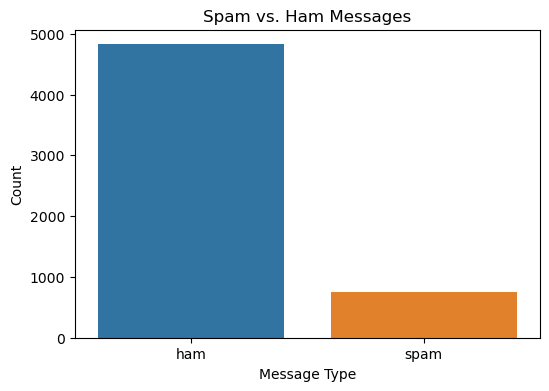

Average number of words per message: 15.49


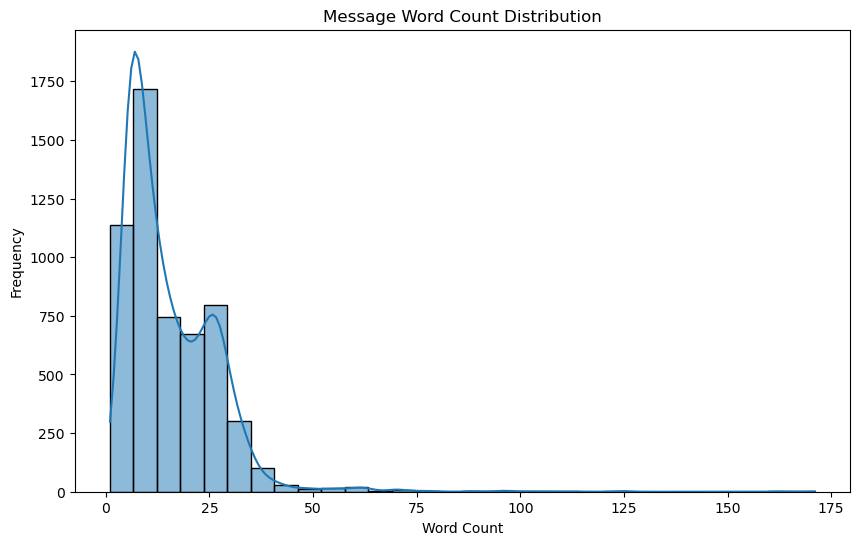

Total number of words: 86335
Top 5 most frequent words:
to: 2134
you: 1622
I: 1466
a: 1327
the: 1197


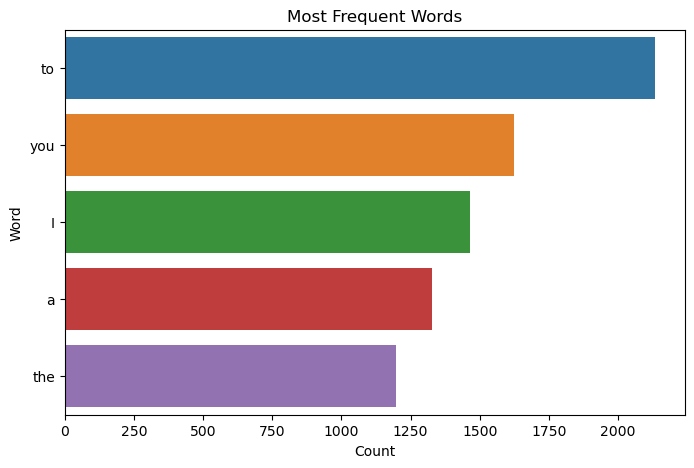

Number of words that appear only once: 9268
Total number of SMS messages: 5572
Number of spam messages: 747
Number of ham messages: 4825
Average number of words per message: 15.49
Five most frequent words: [('to', 2134), ('you', 1622), ('I', 1466), ('a', 1327), ('the', 1197)]
Number of words that appear only once: 9268


In [23]:
def inspect_dataframe(df):
    """Inspect the DataFrame structure."""
    print(df.head())
    print(df.columns)

def total_sms_messages(df):
    """Calculate and print the total number of SMS messages."""
    total_messages = len(df)
    print(f"Total number of SMS messages: {total_messages}")
    return total_messages

def spam_vs_ham_counts(df):
    """Calculate and print the number of spam and ham messages."""
    num_spam = df[df['label'] == 'spam'].shape[0]
    num_ham = df[df['label'] == 'ham'].shape[0]
    print(f"Number of spam messages: {num_spam}")
    print(f"Number of ham messages: {num_ham}")
    return num_spam, num_ham

def plot_spam_vs_ham_distribution(df):
    """Plot the distribution of spam vs. ham messages."""
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='label')
    plt.title('Spam vs. Ham Messages')
    plt.xlabel('Message Type')
    plt.ylabel('Count')
    plt.show()

def average_words_per_message(df):
    """Calculate and print the average number of words per message."""
    df['word_count'] = df['message'].apply(lambda x: len(x.split()))
    average_words = df['word_count'].mean()
    print(f"Average number of words per message: {average_words:.2f}")
    return average_words

def plot_word_count_distribution(df):
    """Plot the distribution of word counts in the messages."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df['word_count'], kde=True, bins=30)
    plt.title('Message Word Count Distribution')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()


def most_frequent_words_and_total_word_count(words, n=5):
    """Calculate and print the n most frequent words."""
    # Count the total number of words
    total_words = len(words)
    # Print the total number of words
    print(f"Total number of words: {total_words}") 
    # Count the frequency of each word in the list
    word_counts = Counter(words) 
    # Get the n most common words
    most_common_words = word_counts.most_common(n)    
     # Print the top n most frequent words
    print(f"Top {n} most frequent words:")
    for word, count in most_common_words:
         print(f"{word}: {count}")
    return most_common_words


def plot_most_frequent_words(most_common_words):
    """Plot the most frequent words."""
    common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
    plt.figure(figsize=(8, 5))
    sns.barplot(data=common_words_df, x='count', y='word')
    plt.title('Most Frequent Words')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

def words_appearing_once(df):
    """Calculate and print the number of words that appear only once."""
    all_words = ' '.join(df['message']).split()
    word_counts = Counter(all_words)
    words_once = [word for word, count in word_counts.items() if count == 1]
    num_words_once = len(words_once)
    print(f"Number of words that appear only once: {num_words_once}")
    return num_words_once

# Load the dataset
file_path = r"C:\Users\USER\Downloads\spam (1).csv"
df = pd.read_csv(file_path, encoding='latin1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df = df[['label', 'message']]
df.info()
# Function calls
inspect_dataframe(df)
total_messages = total_sms_messages(df)
num_spam, num_ham = spam_vs_ham_counts(df)
plot_spam_vs_ham_distribution(df)
average_words = average_words_per_message(df)
plot_word_count_distribution(df)
all_words = ' '.join(df['message']).split()
most_common_words = most_frequent_words_and_total_word_count(all_words)
plot_most_frequent_words(most_common_words)
num_words_once = words_appearing_once(df)

# Summary
print(f"Total number of SMS messages: {total_messages}")
print(f"Number of spam messages: {num_spam}")
print(f"Number of ham messages: {num_ham}")
print(f"Average number of words per message: {average_words:.2f}")
print("Five most frequent words:", most_common_words)
print(f"Number of words that appear only once: {num_words_once}")


 ## **Text Processing**
 

In [24]:
def tokenize_with_nltk(text):
    # Measure the start time
    start_time = time.time()

    # Tokenize the text using NLTK
    tokens = nltk.word_tokenize(text)

    # Filter out punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Measure the end time
    end_time = time.time()

    # Print the execution time
    print("NLTK tokenize time:", end_time - start_time, "seconds")

    return tokens

def tokenize_with_spacy(text):
    # Initialize spaCy's English language model
    nlp = English()
    tokenizer_spacy = Tokenizer(nlp.vocab)

    # Measure the start time
    start_time = time.time()

    # Tokenize the text using spaCy
    tokens = [token.text for token in tokenizer_spacy(text)]

    # Measure the end time
    end_time = time.time()

    # Print the execution time
    print("spaCy tokenize time:", end_time - start_time, "seconds")

    return tokens

# Example usage:
text = df['message'].str.cat(sep=' ')
tokens_nltk = tokenize_with_nltk(text)
print(tokens_nltk[:200])
most_common_words = most_frequent_words_and_total_word_count(tokens_nltk)

print("--------------------------")
tokens_spacy = tokenize_with_spacy(text)
print(tokens_spacy[:200])
most_common_words = most_frequent_words_and_total_word_count(tokens_spacy)


NLTK tokenize time: 1.4604229927062988 seconds
['Go', 'until', 'jurong', 'point', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...', 'Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...', 'Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'T', 'C', "'s", 'apply', '08452810075over18', "'s", 'U', 'dun', 'say', 'so', 'early', 'hor', '...', 'U', 'c', 'already', 'then', 'say', '...', 'Nah', 'I', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though', 'FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'to', 'send', 'å£1.50', 'to', 'rcv', 'Even', '

We see that spaCy is much more efficient and less time consuming. We suppose that one of the reasons for that is the nature of spaCy, since its rules are more efficient and optimized for speed. Logically, time speed for both methods is O(n).
We also see that the output is slightly different for nltk and spaCy. For example, in nltk we have "do" and "n't" as a separate token while in spaCy it 1 token.

 **NLTK Lemmatization**

In [25]:
def lemmatize_text(text):
    # Initialize WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Measure the start time
    start_time = time.time()

    # Lemmatize the text
    lemmatized_words = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word not in string.punctuation]

    # Measure the end time
    end_time = time.time()

    # Print the execution time
    print("NLTK lemmatization time:", end_time - start_time, "seconds")

    return lemmatized_words

# Example usage:
text = df['message'].str.cat(sep=' ')
lemmatized_words = lemmatize_text(text)
print(lemmatized_words[:100])
most_common_words = most_frequent_words_and_total_word_count(lemmatized_words)


NLTK lemmatization time: 2.0599260330200195 seconds
['Go', 'until', 'jurong', 'point', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...', 'Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...', 'Free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'T', 'C', "'s", 'apply', '08452810075over18', "'s", 'U', 'dun', 'say', 'so', 'early', 'hor', '...', 'U', 'c', 'already', 'then', 'say', '...', 'Nah', 'I', 'do', "n't", 'think', 'he', 'go', 'to', 'usf', 'he', 'life', 'around', 'here', 'though', 'FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week']
Total number of words: 90391
Top 5 most frequent words:
to: 2148
I: 1956
you: 1888
a: 1467
the: 1200


**lemmatize the text using spaCy**

In [26]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text_spacy(text):
    # Measure the start time
    start_time = time.time()

    # Lemmatize the text using spaCy
    lemmatized_words = [token.lemma_ for token in nlp(text) if not token.is_punct]

    # Measure the end time
    end_time = time.time()

    # Print the execution time
    print("spaCy lemmatization time:", end_time - start_time, "seconds")

    return lemmatized_words

# Example usage:
text = df['message'].str.cat(sep=' ')
lemmatized_words = lemmatize_text_spacy(text)
print(lemmatized_words[:100])
most_common_words = most_frequent_words_and_total_word_count(lemmatized_words)


spaCy lemmatization time: 31.48029088973999 seconds
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'there', 'get', 'amore', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'text', 'FA', 'to', '87121', 'to', 'receive', 'entry', 'question(std', 'txt', 'rate)T&C', "'s", 'apply', '08452810075over18', "'s", 'U', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say', 'Nah', 'I', 'do', 'not', 'think', 'he', 'go', 'to', 'usf', 'he', 'live', 'around', 'here', 'though', 'FreeMsg', 'hey', 'there', 'darle', 'it', 'be', 'be', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', 'I', 'would', 'like', 'some']
Total number of words: 89158
Top 5 most frequent words:
I: 3719
be: 3258
to: 2309
you: 2217
a: 1421


Lemmatization using spaCy takes more time because, compared to O(n) time complexity of nltk, the one of spaCy is actually O(nlogn). The output is different again, as in nltk some words were not mapped into their meaninigful base structure while spacy actually did this mapping. I.e. in nltk the words were: "Joking", "Going", "do" "n't", and in spaCy: "joke", "go", "do" "not".

**Stemming using NLTK**

In [27]:
def stem_text_nltk(text):
    # Initialize PorterStemmer
    stemmer = PorterStemmer()

    # Measure the start time
    start_time = time.time()

    # Stem the text
    stemmed_words = [stemmer.stem(word) for word in word_tokenize(text) if word not in string.punctuation]

    # Measure the end time
    end_time = time.time()

    # Print the execution time
    print("NLTK stemming time:", end_time - start_time, "seconds")

    return stemmed_words

# Example usage:
text = df['message'].str.cat(sep=' ')
stemmed_words = stem_text_nltk(text)
print("Stemmed SMS messages using NLTK:")
print(stemmed_words[:100])
most_common_words = most_frequent_words_and_total_word_count(stemmed_words)


NLTK stemming time: 3.8410892486572266 seconds
Stemmed SMS messages using NLTK:
['go', 'until', 'jurong', 'point', 'crazi', '..', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amor', 'wat', '...', 'ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...', 'free', 'entri', 'in', '2', 'a', 'wkli', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 't', 'c', "'s", 'appli', '08452810075over18', "'s", 'u', 'dun', 'say', 'so', 'earli', 'hor', '...', 'u', 'c', 'alreadi', 'then', 'say', '...', 'nah', 'i', 'do', "n't", 'think', 'he', 'goe', 'to', 'usf', 'he', 'live', 'around', 'here', 'though', 'freemsg', 'hey', 'there', 'darl', 'it', "'s", 'been', '3', 'week']
Total number of words: 90391
Top 5 most frequent words:
i: 2900
to: 2241
you: 2228
a: 1424
the: 1324


**Stemming using spaCy**

spaCy doesn't have a native stemming function, so we used the 'nltk' stemmer within a spaCy pipeline for this purpose.

In [28]:
# Initialize spaCy and PorterStemmer
nlp = spacy.blank("en")
stemmer = PorterStemmer()

def stem_text_spacy(text):
    # Custom stemming function using spaCy
    def custom_stemmer(doc):
        return [stemmer.stem(token.text) for token in doc]

    # Measure the start time
    start_time = time.time()

    # Tokenize and stem the text
    stemmed_words = custom_stemmer(nlp(text))

    # Measure the end time
    end_time = time.time()

    # Print the execution time
    print("spaCy stemming time:", end_time - start_time, "seconds")

    return stemmed_words

# Example usage:
text = df['message'].str.cat(sep=' ')
stemmed_words = stem_text_spacy(text)
print("Stemmed SMS messages using spaCy and NLTK's PorterStemmer:")
print(stemmed_words[:100])
most_common_words = most_frequent_words_and_total_word_count(stemmed_words)


spaCy stemming time: 4.655331373214722 seconds
Stemmed SMS messages using spaCy and NLTK's PorterStemmer:
['go', 'until', 'jurong', 'point', ',', 'crazi', '..', 'avail', 'onli', 'in', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amor', 'wat', '...', 'ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...', 'free', 'entri', 'in', '2', 'a', 'wkli', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', '.', 'text', 'fa', 'to', '87121', 'to', 'receiv', 'entri', 'question(std', 'txt', 'rate)t&c', "'s", 'appli', '08452810075over18', "'s", 'u', 'dun', 'say', 'so', 'earli', 'hor', '...', 'u', 'c', 'alreadi', 'then', 'say', '...', 'nah', 'i', 'do', "n't", 'think', 'he', 'goe', 'to', 'usf', ',', 'he', 'live', 'around', 'here', 'though', 'freemsg', 'hey', 'there', 'darl', 'it', "'s", 'been', '3', 'week']
Total number of words: 103709
Top 5 most frequent words:
.: 4945
i: 2960
to: 2241
you: 2217
,: 1857


Since spaCy does not have its own stemming algorithm, almost everything is the same (time complexity and the output).

In [29]:
# Define the URL of the Wikipedia page for Selkirk Rex
url = "https://en.wikipedia.org/wiki/Selkirk_Rex"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find the container element that holds the main content of the page
content_div = soup.find('div', {'class': 'mw-parser-output'})

# Find all <p> tags within the content area
if content_div:
    paragraphs = content_div.find_all('p')

    # Extract text from each paragraph and concatenate them into a single string
    text_data = ''
    for paragraph in paragraphs:
        text_data += paragraph.get_text()

    # Print the scraped text data
    print(text_data)
    all_words = text_data.split()
    most_common_words = most_frequent_words_and_total_word_count(all_words)
else:
    print("Main content container not found.")

The Selkirk Rex is a breed of cat with highly curled hair.[1]
The Selkirk Rex is distinct from all other Rex breeds. Unlike the Devon Rex and Cornish Rex, the hair is of normal length and not partly missing. There are longhair and shorthair varieties.[2] It differs from the LaPerm in that the Selkirk Rex coat is plusher and thicker. While the LaPerm gene is a simple dominant, the Selkirk gene (Se) acts as an incomplete dominant; incompletely dominant allele pairs produce three possible genotypes and phenotypes: heterozygous cats (Sese) may have a fuller coat that is preferred in the show ring, while homozygous cats (SeSe) may have a tighter curl and less coat volume.
The Selkirk Rex originated in Montana, USA in 1987, with a litter born to a rescued cat.[3] The only unusually coated kitten in the litter was ultimately placed with breeder, Jeri Newman, who named her Miss DiPesto (after a curly-haired character in the TV series Moonlighting played by Allyce Beasley). This foundation cat 

**We used spacy tokenization on html text**

In [30]:
tokens_nltk = tokenize_with_nltk(text_data)
print(tokens_nltk[:100])
most_common_words = most_frequent_words_and_total_word_count(tokens_nltk)

NLTK tokenize time: 0.03070545196533203 seconds
['The', 'Selkirk', 'Rex', 'is', 'a', 'breed', 'of', 'cat', 'with', 'highly', 'curled', 'hair', '1', 'The', 'Selkirk', 'Rex', 'is', 'distinct', 'from', 'all', 'other', 'Rex', 'breeds', 'Unlike', 'the', 'Devon', 'Rex', 'and', 'Cornish', 'Rex', 'the', 'hair', 'is', 'of', 'normal', 'length', 'and', 'not', 'partly', 'missing', 'There', 'are', 'longhair', 'and', 'shorthair', 'varieties', '2', 'It', 'differs', 'from', 'the', 'LaPerm', 'in', 'that', 'the', 'Selkirk', 'Rex', 'coat', 'is', 'plusher', 'and', 'thicker', 'While', 'the', 'LaPerm', 'gene', 'is', 'a', 'simple', 'dominant', 'the', 'Selkirk', 'gene', 'Se', 'acts', 'as', 'an', 'incomplete', 'dominant', 'incompletely', 'dominant', 'allele', 'pairs', 'produce', 'three', 'possible', 'genotypes', 'and', 'phenotypes', 'heterozygous', 'cats', 'Sese', 'may', 'have', 'a', 'fuller', 'coat', 'that', 'is', 'preferred']
Total number of words: 772
Top 5 most frequent words:
the: 49
of: 24
and: 23
in: 20

**We used NLTK lemmatized on html text**

In [31]:
lemmatized_words = lemmatize_text(text_data)
print(lemmatized_words[:100])
most_common_words = most_frequent_words_and_total_word_count(lemmatized_words)

NLTK lemmatization time: 0.014234542846679688 seconds
['The', 'Selkirk', 'Rex', 'is', 'a', 'breed', 'of', 'cat', 'with', 'highly', 'curled', 'hair', '1', 'The', 'Selkirk', 'Rex', 'is', 'distinct', 'from', 'all', 'other', 'Rex', 'breed', 'Unlike', 'the', 'Devon', 'Rex', 'and', 'Cornish', 'Rex', 'the', 'hair', 'is', 'of', 'normal', 'length', 'and', 'not', 'partly', 'missing', 'There', 'are', 'longhair', 'and', 'shorthair', 'variety', '2', 'It', 'differs', 'from', 'the', 'LaPerm', 'in', 'that', 'the', 'Selkirk', 'Rex', 'coat', 'is', 'plusher', 'and', 'thicker', 'While', 'the', 'LaPerm', 'gene', 'is', 'a', 'simple', 'dominant', 'the', 'Selkirk', 'gene', 'Se', 'act', 'a', 'an', 'incomplete', 'dominant', 'incompletely', 'dominant', 'allele', 'pair', 'produce', 'three', 'possible', 'genotype', 'and', 'phenotype', 'heterozygous', 'cat', 'Sese', 'may', 'have', 'a', 'fuller', 'coat', 'that', 'is', 'preferred']
Total number of words: 772
Top 5 most frequent words:
the: 49
of: 24
and: 23
a: 21
in:

**We used NLTK stemming on html text**

In [32]:
stemmed_words = stem_text_nltk(text_data)
print(stemmed_words[:100])
most_common_words = most_frequent_words_and_total_word_count(stemmed_words)

NLTK stemming time: 0.03751707077026367 seconds
['the', 'selkirk', 'rex', 'is', 'a', 'breed', 'of', 'cat', 'with', 'highli', 'curl', 'hair', '1', 'the', 'selkirk', 'rex', 'is', 'distinct', 'from', 'all', 'other', 'rex', 'breed', 'unlik', 'the', 'devon', 'rex', 'and', 'cornish', 'rex', 'the', 'hair', 'is', 'of', 'normal', 'length', 'and', 'not', 'partli', 'miss', 'there', 'are', 'longhair', 'and', 'shorthair', 'varieti', '2', 'it', 'differ', 'from', 'the', 'laperm', 'in', 'that', 'the', 'selkirk', 'rex', 'coat', 'is', 'plusher', 'and', 'thicker', 'while', 'the', 'laperm', 'gene', 'is', 'a', 'simpl', 'domin', 'the', 'selkirk', 'gene', 'se', 'act', 'as', 'an', 'incomplet', 'domin', 'incomplet', 'domin', 'allel', 'pair', 'produc', 'three', 'possibl', 'genotyp', 'and', 'phenotyp', 'heterozyg', 'cat', 'sese', 'may', 'have', 'a', 'fuller', 'coat', 'that', 'is', 'prefer']
Total number of words: 772
Top 5 most frequent words:
the: 63
of: 24
and: 23
in: 22
breed: 20


In [33]:
# Define the path to your .txt file
file_path = r"C:\Users\USER\Downloads\�צ'אט WhatsApp עם פרוייקט גמר (עמית שטקל) חורף 2024\‏צ'אט WhatsApp עם פרוייקט גמר (עמית שטקל) חורף 2024.txt"

# Read the file content
with open(file_path, 'r', encoding='utf-8') as file:
    messages = file.readlines()

# Concatenate all messages into a single string
all_text = ' '.join(messages)
print(all_text[:300])


2.1.2024, 9:07 - ליעד מדמח: בוקר טוב, מישהו יוכל לרשום יותר מאוחר אם חייב לקחת בן זוג שנמצא באותה קבוצה או שאפשר להצתוות יחד משני קבוצות? (שני הקבוצות של עמית שטקל כמובן)
 2.1.2024, 9:29 - ‏‪+972 52-652-2389‬‏: שאלתי 
 טען שיענה בהמשך כי צריך לחשוב על זה
 2.1.2024, 9:32 - ליעד מדמח: תודה!
 2.1.2024,


In [34]:
def print_word_statistics(tokens, title):
    total_words = len(tokens)
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(5)
    print(f"{title} - Total number of words: {total_words}")
    print(f"{title} - Top 5 most frequent words:")
    for word, count in most_common_words:
        print(f"{word}: {count}")
    print()


In [35]:
def tokenize_hebrew_text(text):
    tokens = word_tokenize(text)
    hebrew_tokens = [token for token in tokens if token.isalnum() and any('\u0590' <= char <= '\u05EA' for char in token)]
    return hebrew_tokens

# דוגמה לשימוש:
hebrew_tokens = tokenize_hebrew_text(all_text)
print(hebrew_tokens[:100])
print_word_statistics(hebrew_tokens, "hebrew_tokens")


['ליעד', 'מדמח', 'בוקר', 'טוב', 'מישהו', 'יוכל', 'לרשום', 'יותר', 'מאוחר', 'אם', 'חייב', 'לקחת', 'בן', 'זוג', 'שנמצא', 'באותה', 'קבוצה', 'או', 'שאפשר', 'להצתוות', 'יחד', 'משני', 'קבוצות', 'שני', 'הקבוצות', 'של', 'עמית', 'שטקל', 'כמובן', 'שאלתי', 'טען', 'שיענה', 'בהמשך', 'כי', 'צריך', 'לחשוב', 'על', 'זה', 'ליעד', 'מדמח', 'תודה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'עמית', 'שטקל', 'הי', 'חברים', 'אתם', 'מוזמנים', 'לפנות', 'אלי', 'בכל', 'שאלה', 'ואעשה', 'מאמץ', 'לעזור', 'ככל', 'יכולתי', 'שיהיה', 'לנו', 'בהצלחה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'עמית', 'שטקל', 'לגבי', 'מציאת', 'בן', 'זוג', 'לפרויקט', 'אני', 'לוקח', 'בחשבון', 'שלא', 'כולם', 'מכירים', 'את', 'כולם', 'ולכן', 'אעזור', 'לכם', 'אנא', 'פנו', 'אלי', 'בבחירת', 'רעיונות', 'אישיים', 'כפי', 'שדיברנו', 'ושאקבל', 'את', 'כולם']
hebrew_tokens - Total number of words: 6030
hebrew_tokens - Top 5 most frequent words:
עמית: 169
שטקל: 147
את: 119
לא: 94
של: 87



In [36]:
def lemmatize_hebrew_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    hebrew_tokens = [token for token in tokens if token.isalnum() and any('\u0590' <= char <= '\u05EA' for char in token)]

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in hebrew_tokens]
    return lemmatized_tokens


lemmatized_tokens = lemmatize_hebrew_text(all_text)

print(lemmatized_tokens[:100])
print_word_statistics(lemmatized_tokens, "lemmatized_tokens")


['ליעד', 'מדמח', 'בוקר', 'טוב', 'מישהו', 'יוכל', 'לרשום', 'יותר', 'מאוחר', 'אם', 'חייב', 'לקחת', 'בן', 'זוג', 'שנמצא', 'באותה', 'קבוצה', 'או', 'שאפשר', 'להצתוות', 'יחד', 'משני', 'קבוצות', 'שני', 'הקבוצות', 'של', 'עמית', 'שטקל', 'כמובן', 'שאלתי', 'טען', 'שיענה', 'בהמשך', 'כי', 'צריך', 'לחשוב', 'על', 'זה', 'ליעד', 'מדמח', 'תודה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'עמית', 'שטקל', 'הי', 'חברים', 'אתם', 'מוזמנים', 'לפנות', 'אלי', 'בכל', 'שאלה', 'ואעשה', 'מאמץ', 'לעזור', 'ככל', 'יכולתי', 'שיהיה', 'לנו', 'בהצלחה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'עמית', 'שטקל', 'לגבי', 'מציאת', 'בן', 'זוג', 'לפרויקט', 'אני', 'לוקח', 'בחשבון', 'שלא', 'כולם', 'מכירים', 'את', 'כולם', 'ולכן', 'אעזור', 'לכם', 'אנא', 'פנו', 'אלי', 'בבחירת', 'רעיונות', 'אישיים', 'כפי', 'שדיברנו', 'ושאקבל', 'את', 'כולם']
lemmatized_tokens - Total number of words: 6030
lemmatized_tokens - Top 5 most frequent words:
עמית: 169
שטקל: 147
את: 119
לא: 94
של: 87



In [37]:
def lemmatize_hebrew_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    hebrew_tokens = [token for token in tokens if token.isalnum() and any('\u0590' <= char <= '\u05EA' for char in token)]

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in hebrew_tokens]
    return lemmatized_tokens


lemmatized_tokens = lemmatize_hebrew_text(all_text)

print(lemmatized_tokens[:100])
print_word_statistics(lemmatized_tokens, "lemmatized_tokens")


['ליעד', 'מדמח', 'בוקר', 'טוב', 'מישהו', 'יוכל', 'לרשום', 'יותר', 'מאוחר', 'אם', 'חייב', 'לקחת', 'בן', 'זוג', 'שנמצא', 'באותה', 'קבוצה', 'או', 'שאפשר', 'להצתוות', 'יחד', 'משני', 'קבוצות', 'שני', 'הקבוצות', 'של', 'עמית', 'שטקל', 'כמובן', 'שאלתי', 'טען', 'שיענה', 'בהמשך', 'כי', 'צריך', 'לחשוב', 'על', 'זה', 'ליעד', 'מדמח', 'תודה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'עמית', 'שטקל', 'הי', 'חברים', 'אתם', 'מוזמנים', 'לפנות', 'אלי', 'בכל', 'שאלה', 'ואעשה', 'מאמץ', 'לעזור', 'ככל', 'יכולתי', 'שיהיה', 'לנו', 'בהצלחה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'עמית', 'שטקל', 'לגבי', 'מציאת', 'בן', 'זוג', 'לפרויקט', 'אני', 'לוקח', 'בחשבון', 'שלא', 'כולם', 'מכירים', 'את', 'כולם', 'ולכן', 'אעזור', 'לכם', 'אנא', 'פנו', 'אלי', 'בבחירת', 'רעיונות', 'אישיים', 'כפי', 'שדיברנו', 'ושאקבל', 'את', 'כולם']
lemmatized_tokens - Total number of words: 6030
lemmatized_tokens - Top 5 most frequent words:
עמית: 169
שטקל: 147
את: 119
לא: 94
של: 87



In [38]:
def stem_hebrew_text(text):
    stemmer = SnowballStemmer("porter")
    tokens = word_tokenize(text)
    hebrew_tokens = [token for token in tokens if token.isalnum() and any('\u0590' <= char <= '\u05EA' for char in token)]
    stemmed_tokens = [stemmer.stem(token) for token in hebrew_tokens]
    return stemmed_tokens
stemmed_tokens = stem_hebrew_text(all_text)

print(stemmed_tokens[:100])
print_word_statistics(stemmed_tokens, "stemmed_tokens")


['ליעד', 'מדמח', 'בוקר', 'טוב', 'מישהו', 'יוכל', 'לרשום', 'יותר', 'מאוחר', 'אם', 'חייב', 'לקחת', 'בן', 'זוג', 'שנמצא', 'באותה', 'קבוצה', 'או', 'שאפשר', 'להצתוות', 'יחד', 'משני', 'קבוצות', 'שני', 'הקבוצות', 'של', 'עמית', 'שטקל', 'כמובן', 'שאלתי', 'טען', 'שיענה', 'בהמשך', 'כי', 'צריך', 'לחשוב', 'על', 'זה', 'ליעד', 'מדמח', 'תודה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'עמית', 'שטקל', 'הי', 'חברים', 'אתם', 'מוזמנים', 'לפנות', 'אלי', 'בכל', 'שאלה', 'ואעשה', 'מאמץ', 'לעזור', 'ככל', 'יכולתי', 'שיהיה', 'לנו', 'בהצלחה', 'לקבוצה', 'באמצעות', 'קישור', 'ההזמנה', 'עמית', 'שטקל', 'לגבי', 'מציאת', 'בן', 'זוג', 'לפרויקט', 'אני', 'לוקח', 'בחשבון', 'שלא', 'כולם', 'מכירים', 'את', 'כולם', 'ולכן', 'אעזור', 'לכם', 'אנא', 'פנו', 'אלי', 'בבחירת', 'רעיונות', 'אישיים', 'כפי', 'שדיברנו', 'ושאקבל', 'את', 'כולם']
stemmed_tokens - Total number of words: 6030
stemmed_tokens - Top 5 most frequent words:
עמית: 169
שטקל: 147
את: 119
לא: 94
של: 87



Since nltk doesnt support hebrew language, we used English package as per Sharon. Obviously, everything looks the same.